In [4]:
import matplotlib.pyplot as plt
import numpy as np
from joblib import Parallel, delayed

import acoustotreams

In [30]:
k0s = 2 * np.pi * np.linspace(1000, 40000, 400) / 343
materials = [acoustotreams.AcousticMaterial(1050, 2350), acoustotreams.AcousticMaterial(998, 1497)]
lmax = 3
radius = 0.005
lattice = acoustotreams.Lattice.cubic(0.015)
kpar = [0, 0, 0]

In [31]:
def compute_svd(k0):
    sphere = acoustotreams.AcousticTMatrix.sphere(lmax, k0, radius, materials)
    svd = np.linalg.svd(sphere.latticeinteraction(lattice, kpar), compute_uv=False)
    return svd[-1]
res = Parallel(n_jobs=-1)(delayed(compute_svd)(k0s[i]) for i in range(len(k0s)))

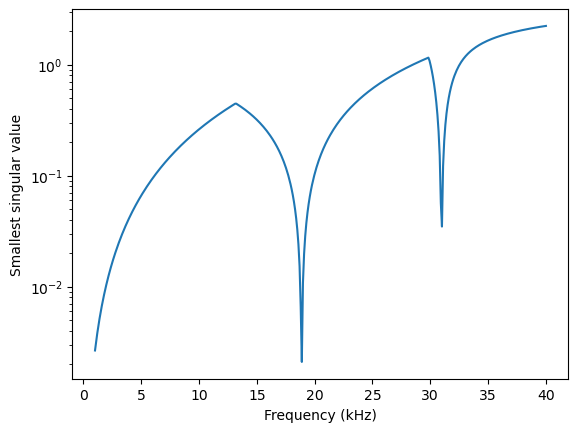

In [32]:
fig, ax = plt.subplots()
ax.set_xlabel("Frequency (kHz)")
ax.set_ylabel("Smallest singular value")
ax.semilogy(343 * k0s / (2 * np.pi) / 1000, res)
plt.show()